In [2]:
# here put the import lib
import numpy as np
from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

### KNN原理

- 假设有一个带有标签的样本数据集（训练样本集），其中包含每条数据与所属分类的对应关系。
- 输入没有标签的新数据后，将新数据的每个特征与样本集中数据对应的特征进行比较。
    - 计算新数据与样本数据集中每条数据的距离。
    - 对求得的所有距离进行排序（从小到大，越小表示越相似）。
    - 取前 k （k 一般小于等于 20 ）个样本数据对应的分类标签。
- 求 k 个数据中出现次数最多的分类标签作为新数据的分类。

### 1准备数据，数据解析

In [3]:
"""
函数说明:打开并解析文件，对数据进行分类：1代表不喜欢,2代表魅力一般,3代表极具魅力

Parameters:
  filename - 文件名
Returns:
  returnMat - 特征矩阵
  classLabelVector - 分类Label向量

"""
def file2matrix(filename):
   #打开文件
   fr = open(filename)
   #读取文件所有内容
   arrayLines = fr.readlines()
   #得到文件行数
   numberOfLines = len(arrayLines)
   #返回的NumPy矩阵,解析完成的数据:numberOfLines行,3列
   # 生成对应的空矩阵
   # 例如：zeros(2，3)就是生成一个 2*3(2行三列的)的矩阵，各个位置上全是 0
   returnMat = np.zeros((numberOfLines,3))
   #返回的分类标签向量
   classLabelVector = []
   #行的索引值
   index = 0
   for line in arrayLines:
       #s.strip(rm)，当rm空时,默认删除空白符(包括'\n','\r','\t',' ')
       line = line.strip()
       #使用s.split(str="",num=string,cout(str))将字符串根据'\t'分隔符进行切片。
       listFormLine = line.split('\t')
       #将数据前三列提取出来,存放到returnMat的NumPy矩阵中,也就是特征矩阵
       returnMat[index,:] = listFormLine[0:3]
       # 每列的类别数据，就是 label 标签数据
       classLabelVector.append(int(listFormLine[-1]))
       index += 1
   return returnMat, classLabelVector

if __name__ == '__main__':
   #打开的文件名 修改自己的路径
   filename = "datingTestSet2.txt"
   #打开并处理数据
   datingDataMat, datingLabels = file2matrix(filename)
   print(datingDataMat)
   print(datingLabels)

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]
[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 3, 1, 3, 1, 2, 2, 1, 1, 3, 3, 1, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 2, 1, 1, 3, 2, 3, 3, 1, 2, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 2, 3, 2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 1, 3, 3, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 1, 2, 1, 2, 2, 1, 

### 2.分析数据，数据可视化

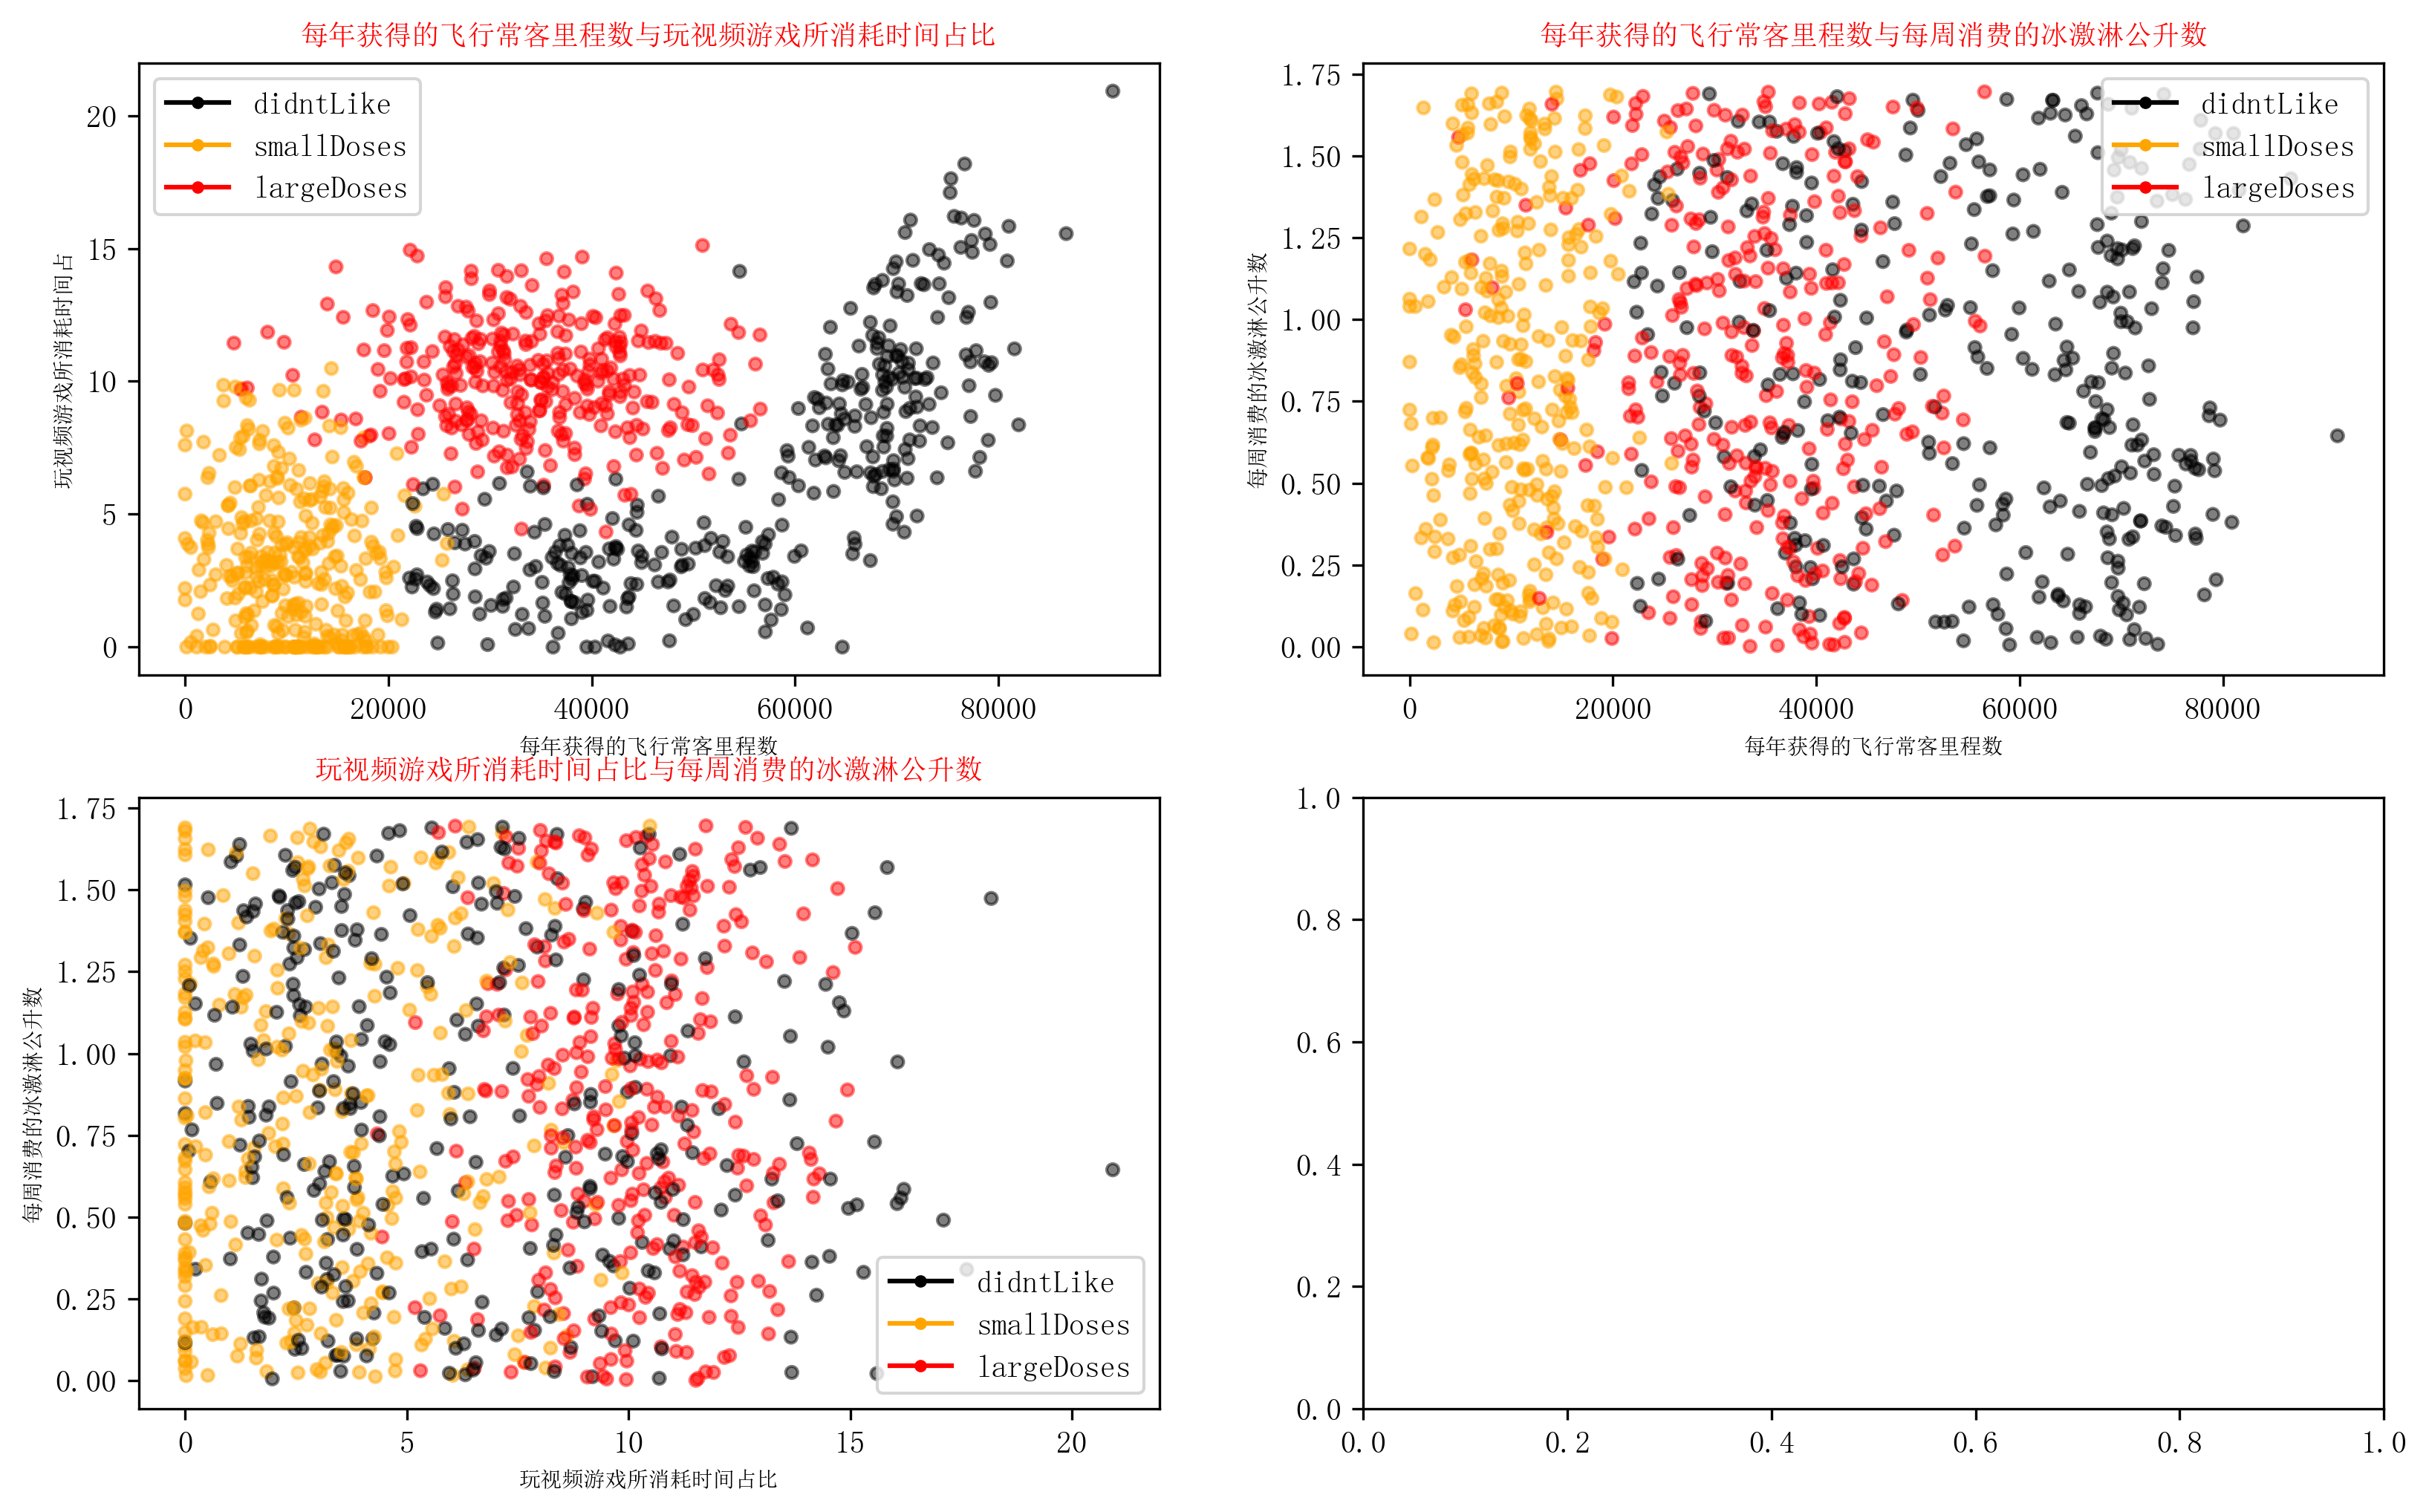

In [4]:
"""
函数说明:可视化数据

Parameters:
  datingDataMat - 特征矩阵
  datingLabels - 分类Label
Returns:
  无

"""
plt.rcParams['savefig.dpi'] =300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
def showdatas(datingDataMat, datingLabels):
   #设置汉字格式
   font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
   #将fig画布分隔成1行1列,不共享x轴和y轴,fig画布的大小为(13,8)
   #当nrow=2,nclos=2时,代表fig画布被分为四个区域,axs[0][0]表示第一行第一个区域
   fig, axs = plt.subplots(nrows=2, ncols=2,sharex=False, sharey=False, figsize=(13,8))

   numberOfLabels = len(datingLabels)
   LabelsColors = []
   for i in datingLabels:
       if i == 1:
           LabelsColors.append('black')
       if i == 2:
           LabelsColors.append('orange')
       if i == 3:
           LabelsColors.append('red')
   #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第二列(玩游戏)数据画散点数据,散点大小为15,透明度为0.5
   axs[0][0].scatter(x=datingDataMat[:,0], y=datingDataMat[:,1], color=LabelsColors,s=15, alpha=.5)
   #设置标题,x轴label,y轴label
   axs0_title_text = axs[0][0].set_title(u'每年获得的飞行常客里程数与玩视频游戏所消耗时间占比',FontProperties=font)
   axs0_xlabel_text = axs[0][0].set_xlabel(u'每年获得的飞行常客里程数',FontProperties=font)
   axs0_ylabel_text = axs[0][0].set_ylabel(u'玩视频游戏所消耗时间占',FontProperties=font)
   plt.setp(axs0_title_text, size=9, weight='bold', color='red')
   plt.setp(axs0_xlabel_text, size=7, weight='bold', color='black')
   plt.setp(axs0_ylabel_text, size=7, weight='bold', color='black')

   #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
   axs[0][1].scatter(x=datingDataMat[:,0], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
   #设置标题,x轴label,y轴label
   axs1_title_text = axs[0][1].set_title(u'每年获得的飞行常客里程数与每周消费的冰激淋公升数',FontProperties=font)
   axs1_xlabel_text = axs[0][1].set_xlabel(u'每年获得的飞行常客里程数',FontProperties=font)
   axs1_ylabel_text = axs[0][1].set_ylabel(u'每周消费的冰激淋公升数',FontProperties=font)
   plt.setp(axs1_title_text, size=9, weight='bold', color='red')
   plt.setp(axs1_xlabel_text, size=7, weight='bold', color='black')
   plt.setp(axs1_ylabel_text, size=7, weight='bold', color='black')

   #画出散点图,以datingDataMat矩阵的第二(玩游戏)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
   axs[1][0].scatter(x=datingDataMat[:,1], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
   #设置标题,x轴label,y轴label
   axs2_title_text = axs[1][0].set_title(u'玩视频游戏所消耗时间占比与每周消费的冰激淋公升数',FontProperties=font)
   axs2_xlabel_text = axs[1][0].set_xlabel(u'玩视频游戏所消耗时间占比',FontProperties=font)
   axs2_ylabel_text = axs[1][0].set_ylabel(u'每周消费的冰激淋公升数',FontProperties=font)
   plt.setp(axs2_title_text, size=9, weight='bold', color='red')
   plt.setp(axs2_xlabel_text, size=7, weight='bold', color='black')
   plt.setp(axs2_ylabel_text, size=7, weight='bold', color='black')
   #设置图例
   didntLike = mlines.Line2D([], [], color='black', marker='.',
                     markersize=6, label='didntLike')
   smallDoses = mlines.Line2D([], [], color='orange', marker='.',
                     markersize=6, label='smallDoses')
   largeDoses = mlines.Line2D([], [], color='red', marker='.',
                     markersize=6, label='largeDoses')
   #添加图例
   axs[0][0].legend(handles=[didntLike,smallDoses,largeDoses])
   axs[0][1].legend(handles=[didntLike,smallDoses,largeDoses])
   axs[1][0].legend(handles=[didntLike,smallDoses,largeDoses])
   #显示图片
   plt.show()

if __name__ == '__main__':
   #打开的文件名
   filename = "datingTestSet2.txt"
   #打开并处理数据
   datingDataMat, datingLabels = file2matrix(filename)
   showdatas(datingDataMat, datingLabels)

### 3.数据归一化   
归一化特征值，消除特征之间量级不同导致的影响  
可采取以下方式$newValue = (oldValue - min) / (max - min)$将任意取值范围的特征值转为0-1区间  


In [5]:
"""
函数说明:对数据进行归一化

Parameters:
  dataSet - 特征矩阵
Returns:
  normDataSet - 归一化后的特征矩阵
  ranges - 数据范围
  minVals - 数据最小值
"""
def autoNorm(dataSet):
   #获得数据的最大最小值
   minVals = dataSet.min(0)
   maxVals =  dataSet.max(0)
   #最大最小值的差
   ranges =  maxVals - minVals
   #shape(dataSet)返回dataSet的矩阵行列数
   normDataSet = np.zeros(np.shape(dataSet))
   #返回dataSet行数
   m = dataSet.shape[0]
   #原始值减去最小值
   normDataSet = dataSet - np.tile(minVals, (m,1))
   #除以最大和最小值的差,得到归一化数据
   normDataSet = normDataSet / np.tile(ranges, (m,1))
   #返回归一化数据结果,数据范围,最小值
   return normDataSet, ranges, minVals
if __name__=='__main__':
    filename="datingTestSet2.txt"
    datingDataMat, datingLabels = file2matrix(filename)
    normDataSet, ranges, minVals=autoNorm(datingDataMat)
    print(normDataSet, ranges, minVals)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]] [9.1273000e+04 2.0919349e+01 1.6943610e+00] [0.       0.       0.001156]


### 4.测试算法：验证分类器   
机器学习算法一个很重要的工作就是评估算法的正确率，通常我们只提供已有数据的90%作为训练样本来训练分类器，而使用其余的10%数据去测试分类器，检测分类器的正确率。需要注意的是，10%的测试数据应该是随机选择的，由于海伦提供的数据并没有按照特定目的来排序，所以我么你可以随意选择10%数据而不影响其随机性。

In [11]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    #距离度量 度量公式为欧氏距离
    diffMat = np.tile(inX, (dataSetSize,1))-dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5

    #将距离排序: 从小到大
    sortedDistIndicies = distances.argsort()
    #选取前K个最短距离， 选取这K个中最多的分类类别
    classCount={}
    for i in range(k): 
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1 
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [13]:
"""
函数说明:分类器测试函数

Parameters:
  无
Returns:
  normDataSet - 归一化后的特征矩阵
  ranges - 数据范围
  minVals - 数据最小值
"""
import operator

def datingClassTest():
   #打开的文件名
   filename = "datingTestSet2.txt"
   #将返回的特征矩阵和分类向量分别存储到datingDataMat和datingLabels中
   datingDataMat, datingLabels = file2matrix(filename)
   #取所有数据的百分之十
   hoRatio = 0.10
   #数据归一化,返回归一化后的矩阵,数据范围,数据最小值
   normMat, ranges, minVals = autoNorm(datingDataMat)
   #获得normMat的行数
   m = normMat.shape[0]
   #百分之十的测试数据的个数
   numTestVecs = int(m * hoRatio)
   #分类错误计数
   errorCount = 0.0

   for i in range(numTestVecs):
       #前numTestVecs个数据作为测试集,后m-numTestVecs个数据作为训练集
       classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:],
           datingLabels[numTestVecs:m], 3)
       print("分类结果:%d\t真实类别:%d" % (classifierResult, datingLabels[i]))
       if classifierResult != datingLabels[i]:
           errorCount += 1.0
   print("错误率:%f%%" %(errorCount/float(numTestVecs)*100))


if __name__=='__main__':
    datingClassTest()

分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:3	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3

### 最后是：使用算法


In [14]:
"""
函数说明:通过输入一个人的三维特征,进行分类输出

Parameters:
  无
Returns:
  无

"""
def classifyPerson():
   #输出结果
   resultList = ['讨厌','有些喜欢','非常喜欢']
   #三维特征用户输入
   ffMiles = float(input("每年获得的飞行常客里程数:"))
   precentTats = float(input("玩视频游戏所耗时间百分比:"))
   iceCream = float(input("每周消费的冰激淋公升数:"))
   #打开的文件名
   filename = "datingTestSet2.txt"
   #打开并处理数据
   datingDataMat, datingLabels = file2matrix(filename)
   #训练集归一化
   normMat, ranges, minVals = autoNorm(datingDataMat)
   #生成NumPy数组,测试集
   inArr = np.array([ffMiles, precentTats, iceCream])
   #测试集归一化
   norminArr = (inArr - minVals) / ranges
   #返回分类结果
   classifierResult = classify0(norminArr, normMat, datingLabels, 3)
   #打印结果
   print("你可能%s这个人" % (resultList[classifierResult-1]))

if __name__ == '__main__':
    classifyPerson()

每年获得的飞行常客里程数: 14488
玩视频游戏所耗时间百分比: 6.7
每周消费的冰激淋公升数: 1


你可能有些喜欢这个人
